<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy import signal, fftpack

In [2]:
from google.colab import files
uploaded = files.upload()

Saving motor_falha.wav to motor_falha.wav


In [4]:
[fs_audio,audio]=wavfile.read('motor_falha.wav')
audio = audio.astype(np.float32)

In [5]:
T = 1/fs_audio
time_audio = np.linspace(0,10,audio.shape[0])
print('A frequência de amostragem é: {}Hz'.format(fs_audio))

A frequência de amostragem é: 44100Hz


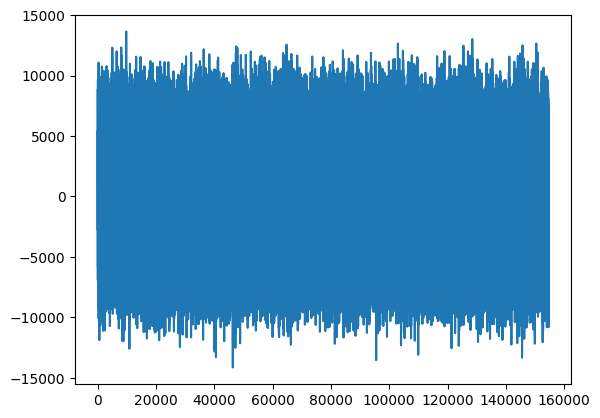

In [6]:
plt.plot(audio)

In [7]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

Text(0.5, 0, 'Frequência (Hz)')

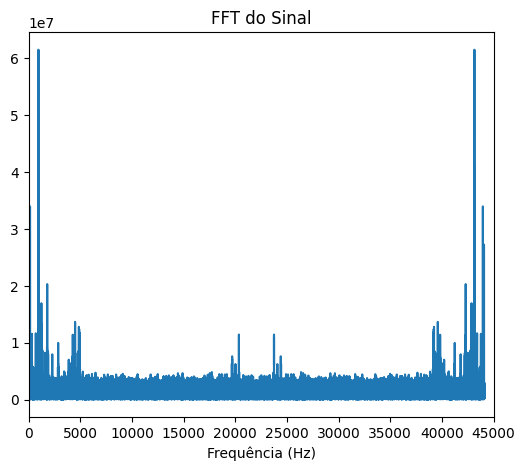

In [8]:
sinal_fft = np.fft.fft(audio)
sinal_fft = abs(sinal_fft)
freq_audio = np.arange(0,fs_audio,fs_audio/sinal_fft.shape[0])

plt.figure(figsize=(6,5))
plt.plot(freq_audio,sinal_fft)
plt.xlim(0,45000)
plt.title('FFT do Sinal')
plt.xlabel('Frequência (Hz)')

154714


Text(0.5, 1.0, 'Espectro de magnitude em frequência')

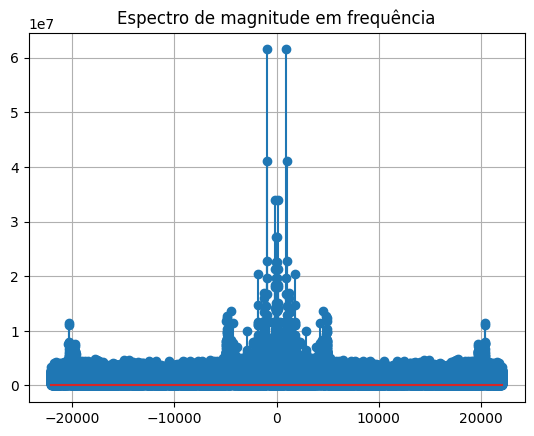

In [11]:

# DFT através do scipy
N = len(audio)
print(N)
DFT_sine = fftpack.fftshift(fftpack.fft(audio,N))
mag_espectro = np.abs(DFT_sine)
f = fftpack.fftshift(fftpack.fftfreq(N, 1 / fs_audio))
plt.stem(f,mag_espectro)
plt.grid()
plt.title('Espectro de magnitude em frequência')

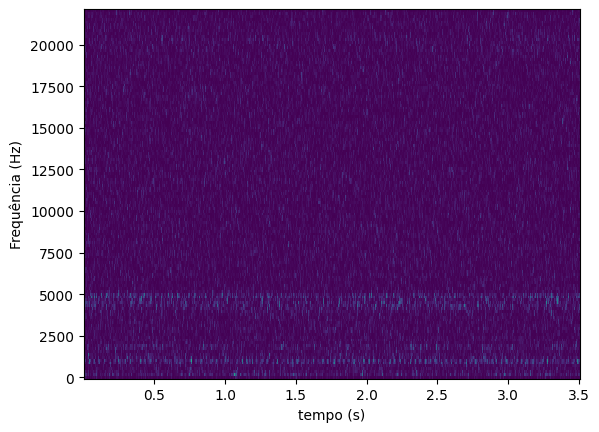

In [14]:
freq,tempo,potencia = signal.spectrogram(audio,fs_audio,window='hann')
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
plt.pcolormesh(tempo,freq,potencia)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving motor_falha.wav to motor_falha.wav


In [ ]:
[fs_audio,audio]=wavfile.read('motor_falha.wav')
audio = audio.astype(np.float32)

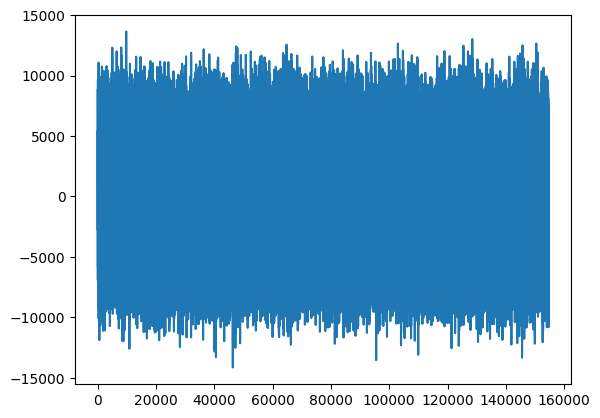

In [ ]:
plt.plot(audio)

In [ ]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

Eventos de Impulsos: